In [1]:
!pip install -U -q PyDrive 


    100% |████████████████████████████████| 993kB 19.5MB/s 


In [2]:
!pip uninstall fastai

Uninstalling fastai-1.0.50.post1:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/fastai-1.0.50.post1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/fastai/*
Proceed (y/n)? y
  Successfully uninstalled fastai-1.0.50.post1


In [3]:
!pip install fastai


    100% |████████████████████████████████| 215kB 7.4MB/s 
    100% |████████████████████████████████| 17.3MB 1.9MB/s 
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
#get file list
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: Tamil_Completedata.zip, id: 1rTs3MrV0WOzHCn5GXjPHKwmbcJNezV5s
title: DevanagariHandwrittenCharacterDataset.zip, id: 15ZBu_kvkKaiojFJNdDzXBDMF4fnRaR2y
title: Colab Notebooks, id: 10e8TZm9S27p78uxyMmMHUUsiG06T7APA
title: exit_questionnaire_sap_labs_ver1.0, id: 1c21Pke3Xh7tBWy3e1SG5OjPaairWnfgfRXHWYEgQzH8
title: exit_questionnaire_sap_labs_ver1.0, id: 1YZ7Z7H9QLqqLSUITFCTrdQVfw2b-gmj10ssoJD3COxc


In [0]:
fid = drive.ListFile({'q':"title='Tamil_Completedata.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('Tamil_Completedata.zip')

In [7]:
!unzip Tamil_Completedata.zip


Archive:  Tamil_Completedata.zip
   creating: Tamil_Completedata/
Tamil_Completedata/ஃ/:  mismatching "local" filename (Tamil_Completedata/роГ/),
         continuing with "central" filename version
   creating: Tamil_Completedata/ஃ/
Tamil_Completedata/ஃ/ஃ (1).jpg:  mismatching "local" filename (Tamil_Completedata/роГ/роГ (1).jpg),
         continuing with "central" filename version
  inflating: Tamil_Completedata/ஃ/ஃ (1).jpg  
Tamil_Completedata/ஃ/ஃ (10).jpg:  mismatching "local" filename (Tamil_Completedata/роГ/роГ (10).jpg),
         continuing with "central" filename version
  inflating: Tamil_Completedata/ஃ/ஃ (10).jpg  
Tamil_Completedata/ஃ/ஃ (100).jpg:  mismatching "local" filename (Tamil_Completedata/роГ/роГ (100).jpg),
         continuing with "central" filename version
 extracting: Tamil_Completedata/ஃ/ஃ (100).jpg  
Tamil_Completedata/ஃ/ஃ (11).jpg:  mismatching "local" filename (Tamil_Completedata/роГ/роГ (11).jpg),
         continuing with "central" filename version
  inflatin

In [8]:
!pip install split-folders

In [0]:
import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
split_folders.ratio('Tamil_Completedata', output="Tamil_Data", seed=1337, ratio=(.8, .2)) # default values

In [0]:
from fastai import *
from fastai.vision import *

In [11]:
path = Path("Tamil_Data")
path.ls()

[PosixPath('Tamil_Data/val'), PosixPath('Tamil_Data/train')]

In [0]:
bs = 64
#

In [13]:
fnames = get_image_files(path)
fnames[:5]

[]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
import os
os.rename("Tamil_Data/val","Tamil_Data/valid")

In [0]:
data = ImageDataBunch.from_folder(path, size=26)

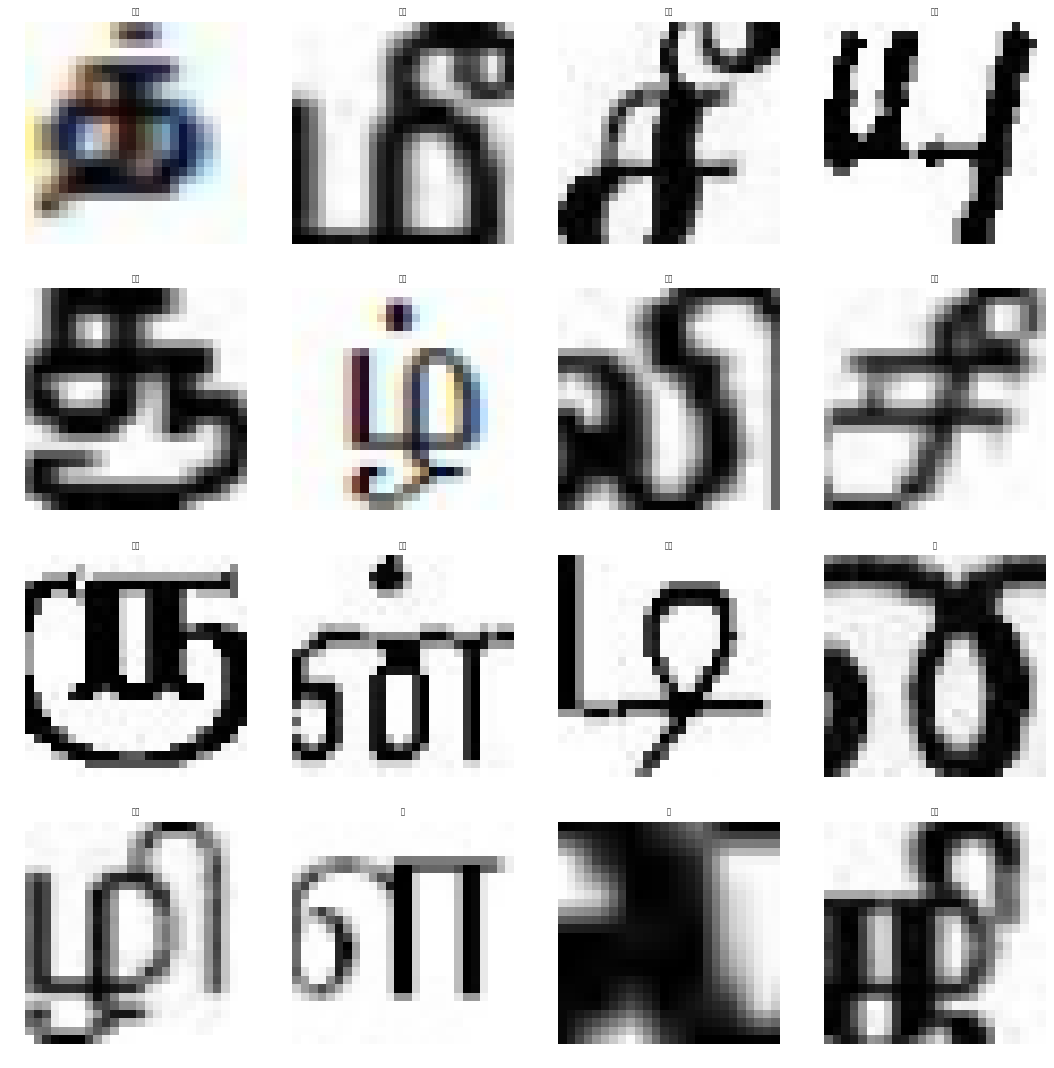

In [17]:
data.show_batch(rows=4, figsize=(15,15))

In [18]:
print(data.classes)

['ஃ', 'அ', 'ஆ', 'இ', 'ஈ', 'உ', 'ஊ', 'எ', 'ஏ', 'ஐ', 'ஒ', 'ஓ', 'க', 'கி', 'கீ', 'கு', 'கூ', 'க்', 'ங', 'ஙி', 'ஙீ', 'ஙு', 'ஙூ', 'ங்', 'ச', 'சி', 'சீ', 'சு', 'சூ', 'ச்', 'ஞ', 'ஞி', 'ஞீ', 'ஞு', 'ஞூ', 'ஞ்', 'ட', 'டி', 'டீ', 'டு', 'டூ', 'ட்', 'ண', 'ணி', 'ணீ', 'ணு', 'ணூ', 'ண்', 'த', 'தி', 'தீ', 'து', 'தூ', 'த்', 'ந', 'நி', 'நீ', 'நு', 'நூ', 'ந்', 'ன', 'னி', 'னீ', 'னு', 'னூ', 'ன்', 'ப', 'பி', 'பீ', 'பு', 'பூ', 'ப்', 'ம', 'மி', 'மீ', 'மு', 'மூ', 'ம்', 'ய', 'யி', 'யீ', 'யு', 'யூ', 'ய்', 'ர', 'ரி', 'ரீ', 'ரு', 'ரூ', 'ர்', 'ற', 'றி', 'றீ', 'று', 'றூ', 'ற்', 'ல', 'லி', 'லீ', 'லு', 'லூ', 'ல்', 'ள', 'ளி', 'ளீ', 'ளு', 'ளூ', 'ள்', 'ழ', 'ழி', 'ழீ', 'ழு', 'ழூ', 'ழ்', 'வ', 'வி', 'வீ', 'வு', 'வூ', 'வ்', 'ா', 'ெ', 'ே', 'ை']


In [19]:
len(data.classes)

124

Training:resnet 34

In [20]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 82510716.16it/s]


In [21]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,4.458559,3.617995,0.799597
2,3.217994,2.590689,0.644355
3,2.478802,2.174640,0.558065
4,2.107023,2.106650,0.538306


In [0]:
learn.save('stage-1')

Unfreezing and fine tuning


In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.58E-06


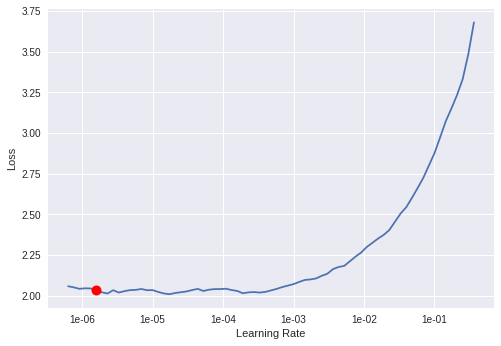

In [0]:

learn.recorder.plot()

In [0]:
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,1.974127,1.932773,0.510081
2,1.792607,1.782644,0.482661
3,1.700171,1.744807,0.478629


In [0]:
learn.save('stage-2')

In [0]:
learn.fit_one_cycle(1, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,1.597748,1.637174,0.447177


In [0]:
learn.save('stage-3')

In [0]:
learn.fit_one_cycle(1, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,1.507983,1.582114,0.438710


In [0]:
learn.save('stage-4')

In [0]:
learn.fit_one_cycle(1, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,1.406094,1.518462,0.420161


In [0]:
learn.save('stage-5')

Interpretation

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

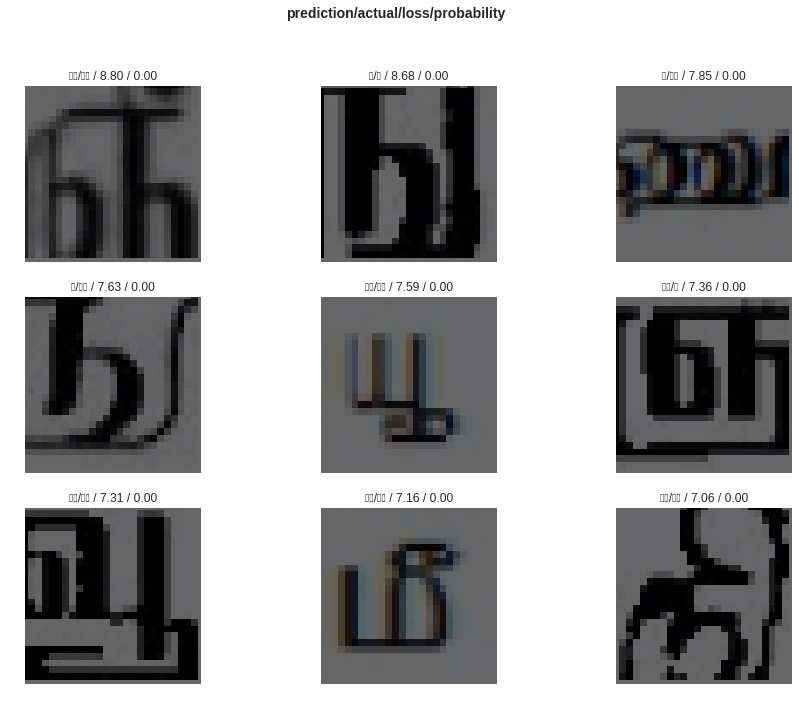

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

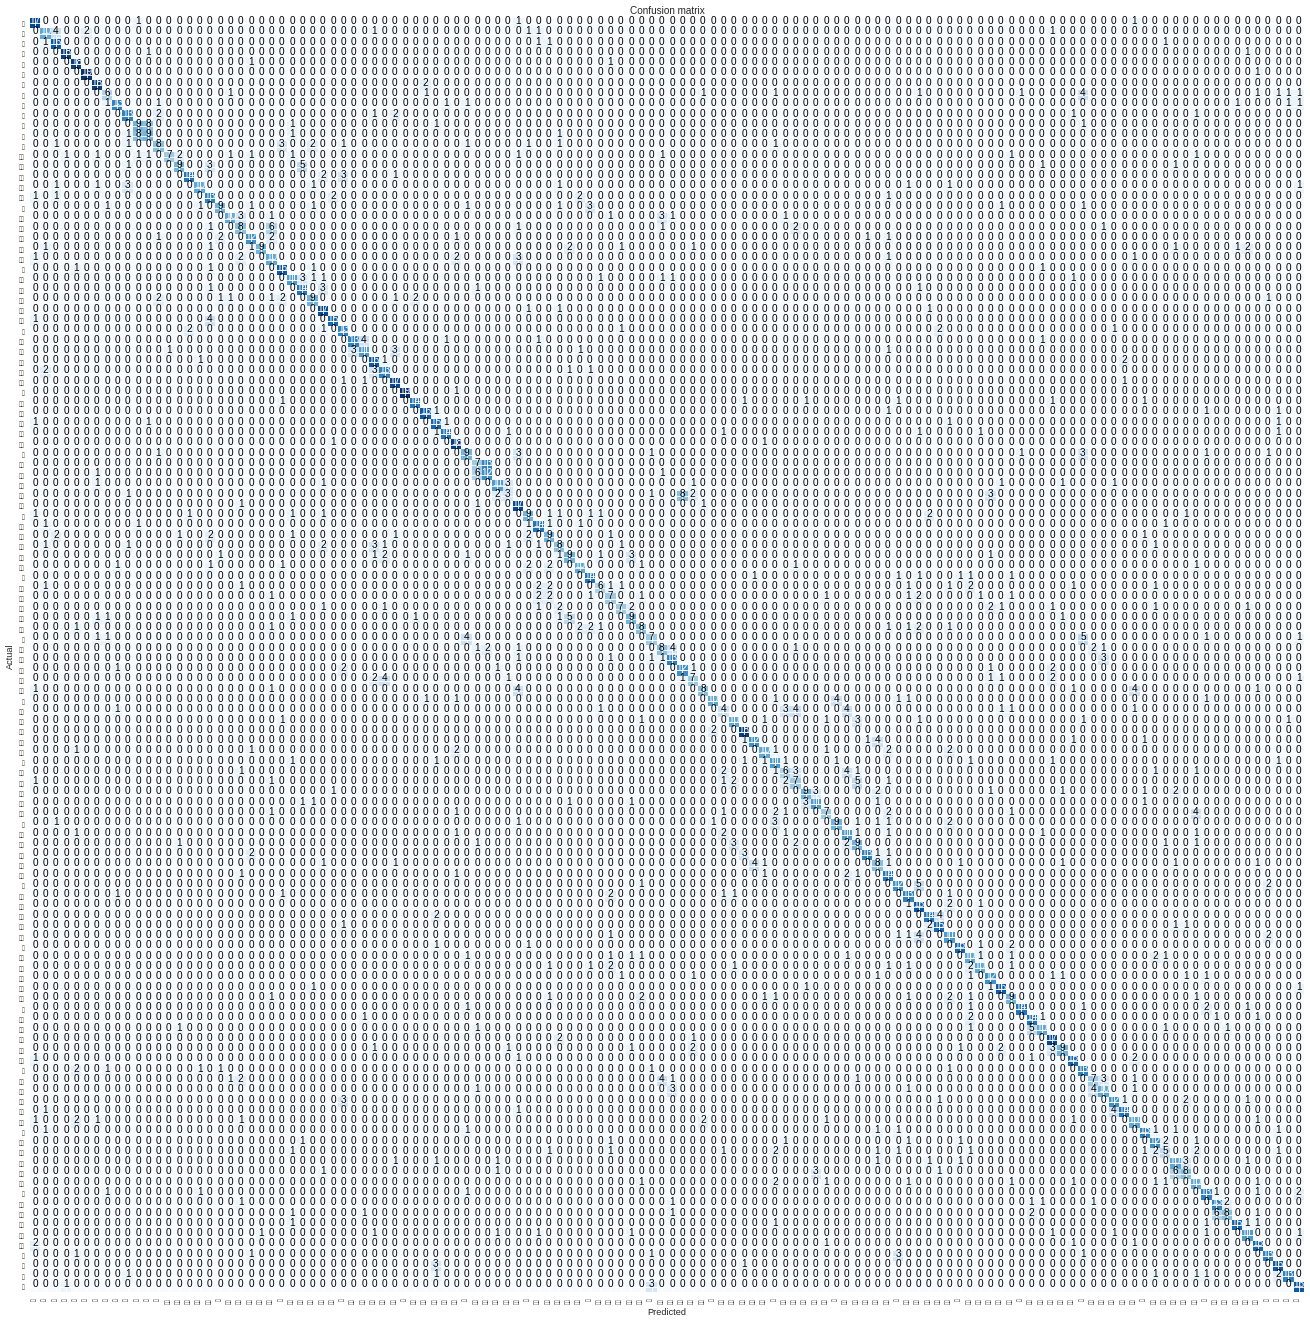

In [0]:
interp.plot_confusion_matrix(figsize=(22,22), dpi=60)

In [0]:
interp.most_confused(min_val=2)

[('ணி', 'ணீ', 13),
 ('ஒ', 'ஓ', 8),
 ('ஓ', 'ஒ', 8),
 ('ணூ', 'னு', 8),
 ('ஙீ', 'ங்', 6),
 ('ணீ', 'ணி', 6),
 ('ழூ', 'ழு', 6),
 ('வீ', 'வி', 6),
 ('கீ', 'சீ', 5),
 ('நூ', 'தூ', 5),
 ('ன', 'ள', 5),
 ('மீ', 'யீ', 5),
 ('ர', 'ரீ', 5),
 ('லீ', 'லி', 5),
 ('அ', 'ஆ', 4),
 ('எ', 'ள', 4),
 ('ச்', 'க்', 4),
 ('ஞி', 'ஞீ', 4),
 ('ன', 'ண', 4),
 ('னி', 'னீ', 4),
 ('னூ', 'ஞூ', 4),
 ('ன்', 'ண்', 4),
 ('ன்', 'ள்', 4),
 ('ப', 'ய', 4),
 ('பி', 'மீ', 4),
 ('பி', 'யி', 4),
 ('பூ', 'யூ', 4),
 ('மி', 'யி', 4),
 ('ம்', 'ழ்', 4),
 ('யூ', 'பூ', 4),
 ('ரு', 'ரூ', 4),
 ('ர்', 'ரீ', 4),
 ('ளி', 'னி', 4),
 ('ளீ', 'ளி', 4),
 ('ளூ', 'ளு', 4),
 ('க', 'ச', 3),
 ('கீ', 'க்', 3),
 ('கு', 'ஞ', 3),
 ('கூ', 'ஐ', 3),
 ('ங', 'ந', 3),
 ('ஙி', 'ஙீ', 3),
 ('ஙி', 'னி', 3),
 ('ங்', 'ண்', 3),
 ('சி', 'சீ', 3),
 ('சீ', 'சூ', 3),
 ('ஞீ', 'ஞி', 3),
 ('ஞீ', 'ஞ்', 3),
 ('ஞூ', 'ஞு', 3),
 ('ண', 'ண்', 3),
 ('ண', 'ள', 3),
 ('ணு', 'ணூ', 3),
 ('ணூ', 'று', 3),
 ('து', 'ஞு', 3),
 ('தூ', 'நூ', 3),
 ('னீ', 'ளீ', 3),
 ('பி', 'மி', 3),
 ('பீ', 'யீ', 3

Training Resnet 50

In [0]:
#data = ImageDataBunch.from_name_re(path, fnames, pat, ds_tfms=get_transforms(),size=299, bs=bs//2).normalize(imagenet_stats)
data = (ImageItemList.from_folder(path) .random_split_by_pct() .label_from_folder() .transform(get_transforms(), size=224) .databunch())

In [0]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 99252895.99it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-02


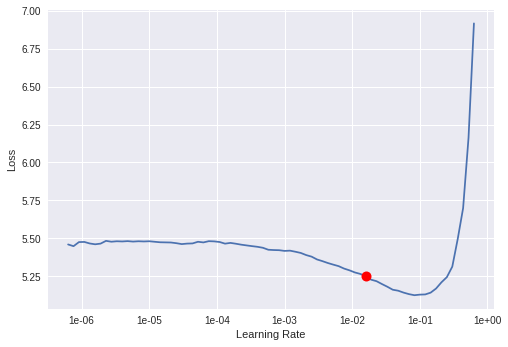

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate
1,4.457110,3.546855,0.809677
2,2.992335,1.809415,0.510081
3,1.800677,0.999851,0.309274
4,1.246532,0.665780,0.211290
5,1.017202,0.528702,0.179435
6,0.859807,0.457661,0.155645
7,0.734048,0.411233,0.141935
8,0.678867,0.407240,0.139113


In [0]:
learn.save('stage-1-50')

In [0]:
#learn.unfreeze()
#learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

In [0]:
#learn.load('stage-1-50');'

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.most_confused(min_val=2)

[('ணி', 'ணீ', 13),
 ('ணூ', 'ணு', 9),
 ('ன', 'ண', 8),
 ('ளு', 'ளூ', 8),
 ('ணீ', 'ணி', 7),
 ('ய', 'ப', 7),
 ('னு', 'ணு', 6),
 ('பி', 'யி', 6),
 ('ஓ', 'ஒ', 5),
 ('னு', 'னூ', 5),
 ('னூ', 'ணூ', 5),
 ('ர்', 'ா', 5),
 ('ளி', 'னி', 5),
 ('ஒ', 'ஓ', 4),
 ('க', 'கூ', 4),
 ('ஞு', 'ஞூ', 4),
 ('ணூ', 'னூ', 4),
 ('பீ', 'யீ', 4),
 ('மு', 'மூ', 4),
 ('ரு', 'ரூ', 4),
 ('லு', 'லூ', 4),
 ('ண', 'ை', 3),
 ('ணூ', 'னு', 3),
 ('ண்', 'ணீ', 3),
 ('து', 'தூ', 3),
 ('நூ', 'ஞூ', 3),
 ('நூ', 'தூ', 3),
 ('னி', 'ளி', 3),
 ('னீ', 'ணீ', 3),
 ('னு', 'ணூ', 3),
 ('னூ', 'னு', 3),
 ('யு', 'பு', 3),
 ('ர', 'ா', 3),
 ('றூ', 'லூ', 3),
 ('லூ', 'லு', 3),
 ('ளீ', 'ளி', 3),
 ('ழூ', 'ழு', 3),
 ('வீ', 'வி', 3),
 ('ை', 'ண', 3)]

Resnet 50 clearly performs better